In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Cleaned_Temperature_Data.xlsx')

In [3]:
data.head()

,Date,Rainfall (inch),BH1_0.9m_Temp_C,BH1_1.8m_Temp_C,Air_Temp_F,Air_Temp_C
0,2016-10-03,0.00,25.567,26.171,75.9,24.388889
1,2016-10-04,0.00,25.713,26.100,78.6,25.888889
2,2016-10-05,0.00,25.946,26.100,82.6,28.111111
3,2016-10-06,0.06,26.446,26.158,82.8,28.222222
4,2016-10-07,0.39,26.663,26.300,72.3,22.388889


In [4]:
data.shape

(1165, 6)

In [5]:
data.isna().sum()

Date                 0
Rainfall (inch)      0
BH1_0.9m_Temp_C     12
BH1_1.8m_Temp_C    353
Air_Temp_F          11
Air_Temp_C          11
dtype: int64

In [6]:
# data = data.dropna()
#Handling Missing values
# Mean imputation for missing values
data['BH1_0.9m_Temp_C'].fillna(data['BH1_0.9m_Temp_C'].mean(), inplace=True)
data['BH1_1.8m_Temp_C'].fillna(data['BH1_1.8m_Temp_C'].mean(), inplace=True)
data['Air_Temp_F'].fillna(data['Air_Temp_F'].mean(), inplace=True)
data['Air_Temp_C'].fillna(data['Air_Temp_C'].mean(), inplace=True)

In [7]:
data.shape

(1165, 6)

In [8]:
data.isna().sum()

Date               0
Rainfall (inch)    0
BH1_0.9m_Temp_C    0
BH1_1.8m_Temp_C    0
Air_Temp_F         0
Air_Temp_C         0
dtype: int64

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_year'] = data['Date'].dt.dayofyear

In [10]:
data.describe()

,Date,Rainfall (inch),BH1_0.9m_Temp_C,BH1_1.8m_Temp_C,Air_Temp_F,Air_Temp_C,day_of_year
count,1165,1165.000000,1165.00000,1165.000000,1165.000000,1165.000000,1165.000000
mean,2018-05-08 00:00:00,0.071313,20.59214,21.291655,68.545061,20.302811,190.738197
min,2016-10-03 00:00:00,0.000000,8.50400,11.200000,23.200000,-4.888889,1.000000
25%,2017-07-21 00:00:00,0.000000,15.53300,19.200000,56.800000,13.777778,98.000000
50%,2018-05-08 00:00:00,0.000000,20.33700,21.291655,70.200000,21.222222,195.000000
75%,2019-02-23 00:00:00,0.000000,25.97500,24.283000,82.200000,27.888889,288.000000
max,2019-12-11 00:00:00,4.140000,30.80800,29.700000,97.000000,36.111111,366.000000
std,NaN,0.252663,5.86034,4.164601,15.743275,8.746264,106.805718


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1165 non-null   datetime64[ns]
 1   Rainfall (inch)  1165 non-null   float64       
 2   BH1_0.9m_Temp_C  1165 non-null   float64       
 3   BH1_1.8m_Temp_C  1165 non-null   float64       
 4   Air_Temp_F       1165 non-null   float64       
 5   Air_Temp_C       1165 non-null   float64       
 6   day_of_year      1165 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 59.3 KB


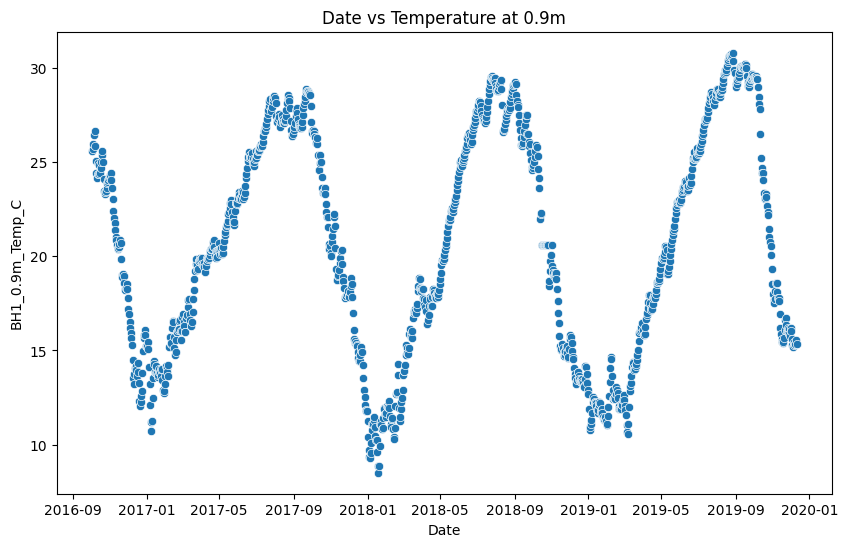

In [12]:
# Visualize the relationship between Air Temp and Temperatures at different depths
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Date'], y=data['BH1_0.9m_Temp_C'],palette='rocket')
plt.title('Date vs Temperature at 0.9m')
plt.show()

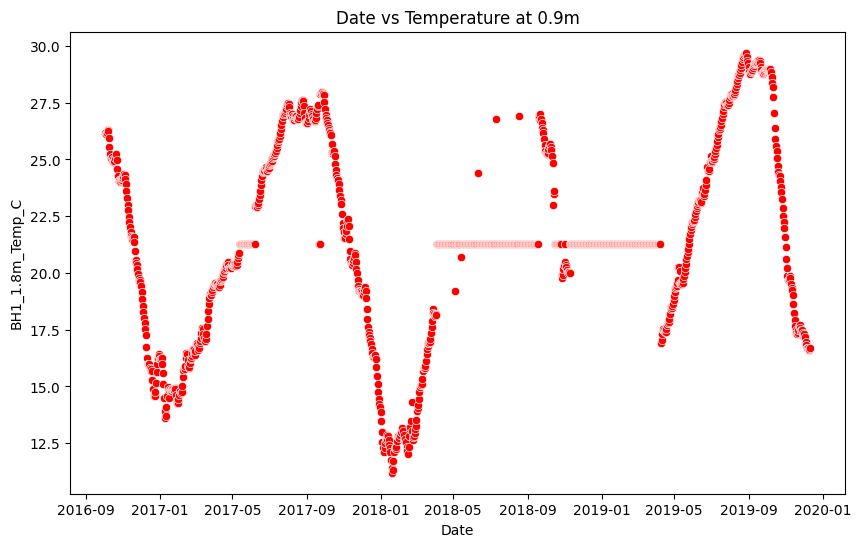

In [13]:
# Visualize the relationship between Air Temp and Temperatures at different depths
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Date'], y=data['BH1_1.8m_Temp_C'],color='r')
plt.title('Date vs Temperature at 0.9m')
plt.show()

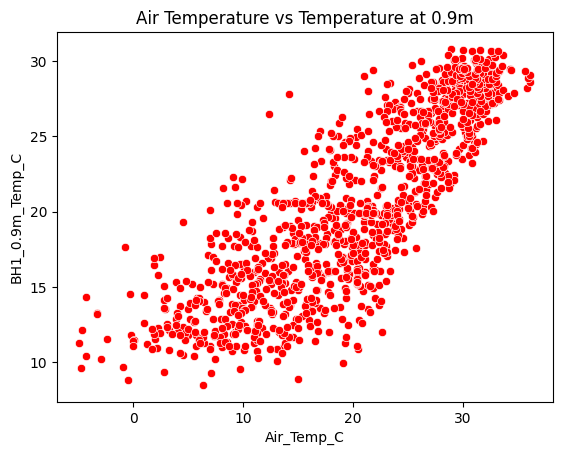

In [14]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air_Temp_C'], y=data['BH1_0.9m_Temp_C'],color='r')
plt.title('Air Temperature vs Temperature at 0.9m')
plt.show()

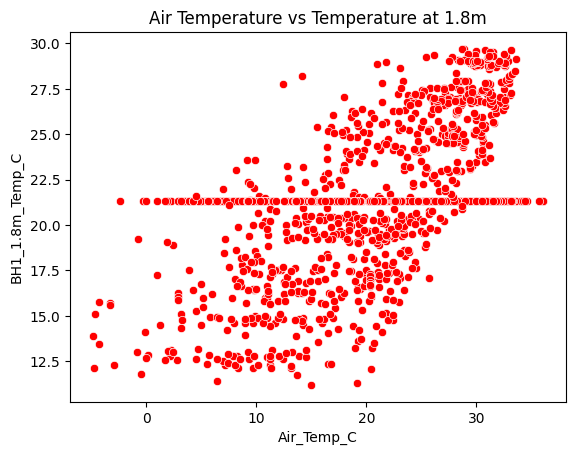

In [15]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air_Temp_C'], y=data['BH1_1.8m_Temp_C'],color='r')
plt.title('Air Temperature vs Temperature at 1.8m')
plt.show()

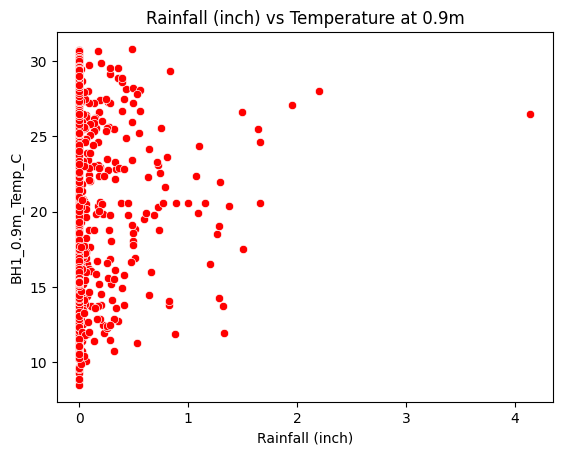

In [16]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Rainfall (inch)'], y=data['BH1_0.9m_Temp_C'],color='r')
plt.title('Rainfall (inch) vs Temperature at 0.9m')
plt.show()

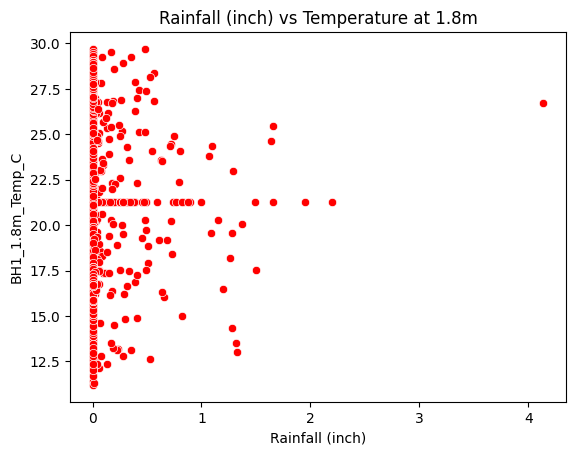

In [17]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Rainfall (inch)'], y=data['BH1_1.8m_Temp_C'],color='r')
plt.title('Rainfall (inch) vs Temperature at 1.8m')
plt.show()

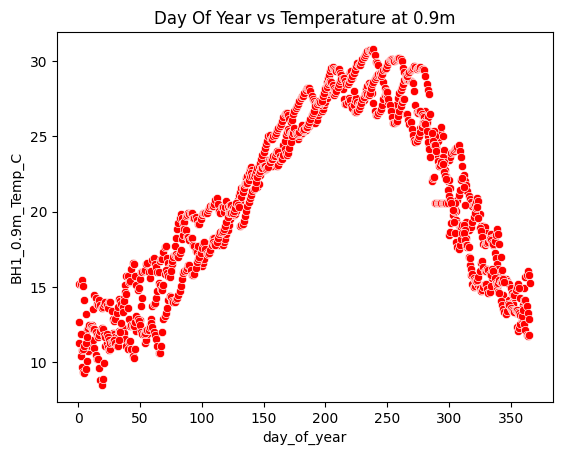

In [18]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['BH1_0.9m_Temp_C'],color='r')
plt.title('Day Of Year vs Temperature at 0.9m')
plt.show()

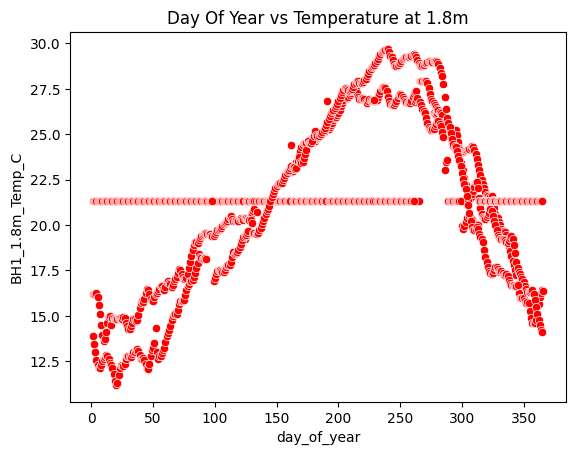

In [19]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['BH1_1.8m_Temp_C'],color='r')
plt.title('Day Of Year vs Temperature at 1.8m')
plt.show()

<Axes: >

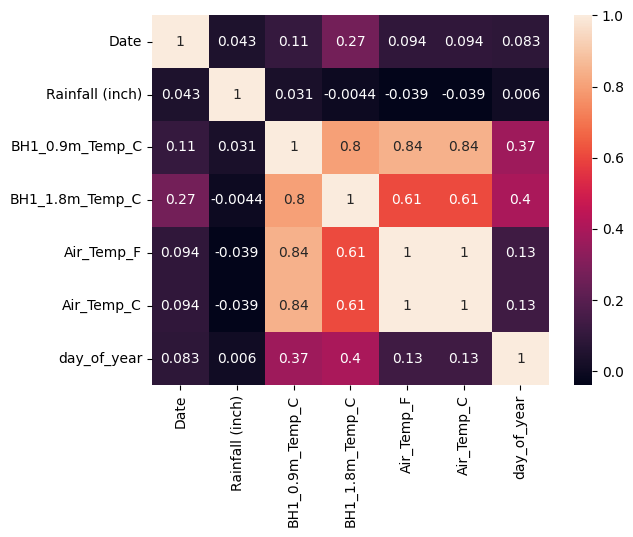

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [22]:
cols=['Rainfall (inch)','BH1_0.9m_Temp_C','BH1_1.8m_Temp_C','Air_Temp_C','day_of_year']
data = remove_outliers(data, cols)

In [23]:
data.shape

(907, 7)

In [24]:
X = data[['Air_Temp_C', 'Rainfall (inch)', 'day_of_year']]
y = data[['BH1_0.9m_Temp_C', 'BH1_1.8m_Temp_C']]

In [25]:
X.head()

,Air_Temp_C,Rainfall (inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
2,28.111111,0.0,279
5,18.666667,0.0,282
6,18.611111,0.0,283


In [26]:
y.head()

,BH1_0.9m_Temp_C,BH1_1.8m_Temp_C
0,25.567,26.171
1,25.713,26.100
2,25.946,26.100
5,25.850,26.258
6,25.046,25.929


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X.shape,X_train.shape,X_test.shape

((907, 3), (680, 3), (227, 3))

In [29]:
#Starndardization (Scaling the data)

# from sklearn.preprocessing import StandardScaler
scaler_x = MinMaxScaler()
scaler_y=MinMaxScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
# y_train = scaler_y.fit_transform(y_train)
# y_test = scaler_y.transform(y_test)

In [30]:
X_train

array([[0.22357724, 0.        , 0.97534247],
       [0.76558266, 0.        , 0.76438356],
       [0.30758808, 0.        , 0.09041096],
       ...,
       [0.84823848, 0.        , 0.75068493],
       [0.49728997, 0.        , 0.25753425],
       [0.33739837, 0.        , 0.09315068]])

In [31]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np

In [32]:
def evaluate_model(y_true, y_pred):
    """Calculate evaluation metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [33]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    'XGBRegressor':XGBRegressor(),
}

In [34]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """Train and evaluate models, and identify the best model based on R² score."""
    results = {}
    best_model_name = None
    best_r2_score = -float('inf')  # Initialize to a very low value

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        try:
            model.fit(X_train, y_train)  # Train the model

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Evaluate Train and Test dataset
            model_train_metrics = evaluate_model(y_train, y_train_pred)
            model_test_metrics = evaluate_model(y_test, y_test_pred)

            # Store results
            results[model_name] = {
                "train_metrics": model_train_metrics,
                "test_metrics": model_test_metrics
            }

            # Print results
            print(f'{model_name} Performance:')
            print('- Training set:')
            print(f"  - RMSE: {model_train_metrics[1]:.4f}, MAE: {model_train_metrics[0]:.4f}, R2: {model_train_metrics[2]:.4f}")
            print('- Test set:')
            print(f"  - RMSE: {model_test_metrics[1]:.4f}, MAE: {model_test_metrics[0]:.4f}, R2: {model_test_metrics[2]:.4f}")
            print('=' * 30)

            # Check for the best model based on the R² score of the test set
            if model_test_metrics[2] > best_r2_score:
                best_r2_score = model_test_metrics[2]
                best_model_name = model_name

        except Exception as e:
            print(f"Error training {model_name}: {e}")

    # Set the best model variable
    best_model = models[best_model_name] if best_model_name else None

    print(f"The best model is: {best_model_name} with an R² score of {best_r2_score:.4f}")
    
    return results, best_model

# Call the function
results, best_model = train_and_evaluate(models, X_train, y_train, X_test, y_test)


Training Linear Regression...
Linear Regression Performance:
- Training set:
  - RMSE: 2.8603, MAE: 2.3269, R2: 0.6438
- Test set:
  - RMSE: 2.9706, MAE: 2.4384, R2: 0.6035
Training Lasso...
Lasso Performance:
- Training set:
  - RMSE: 4.9345, MAE: 4.0056, R2: 0.0677
- Test set:
  - RMSE: 4.8782, MAE: 3.9899, R2: 0.0710
Training Ridge...
Ridge Performance:
- Training set:
  - RMSE: 2.8627, MAE: 2.3380, R2: 0.6434
- Test set:
  - RMSE: 2.9630, MAE: 2.4415, R2: 0.6052
Training ElasticNet...
ElasticNet Performance:
- Training set:
  - RMSE: 5.0320, MAE: 4.0835, R2: 0.0426
- Test set:
  - RMSE: 4.9850, MAE: 4.0723, R2: 0.0438
Training Decision Tree Regressor...
Decision Tree Regressor Performance:
- Training set:
  - RMSE: 0.0760, MAE: 0.0058, R2: 0.9998
- Test set:
  - RMSE: 2.3773, MAE: 1.3982, R2: 0.7055
Training Random Forest Regressor...
Random Forest Regressor Performance:
- Training set:
  - RMSE: 0.7260, MAE: 0.5011, R2: 0.9740
- Test set:
  - RMSE: 1.9283, MAE: 1.3179, R2: 0.8083


Text(0, 0.5, 'Predicted Values')

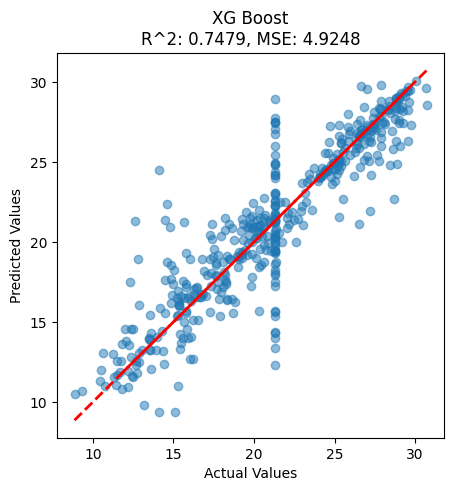

In [35]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"XG Boost\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

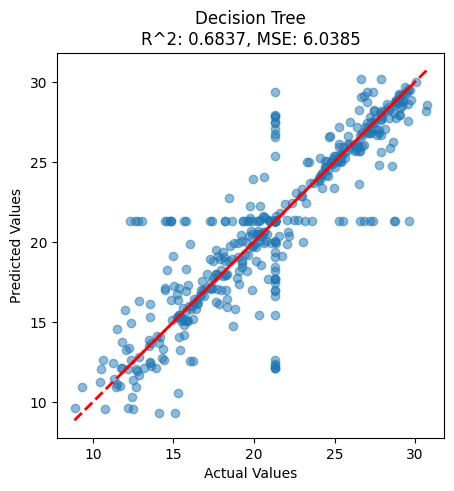

In [36]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Decision Tree\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

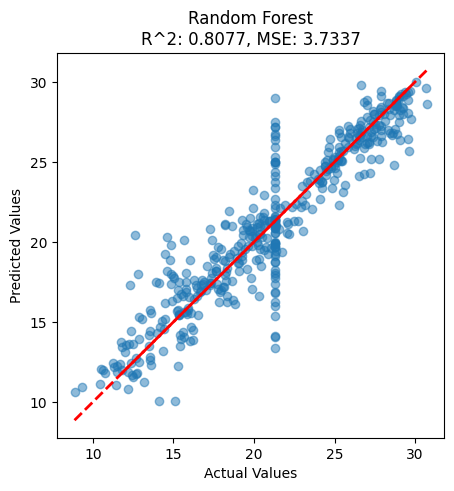

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Random Forest\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

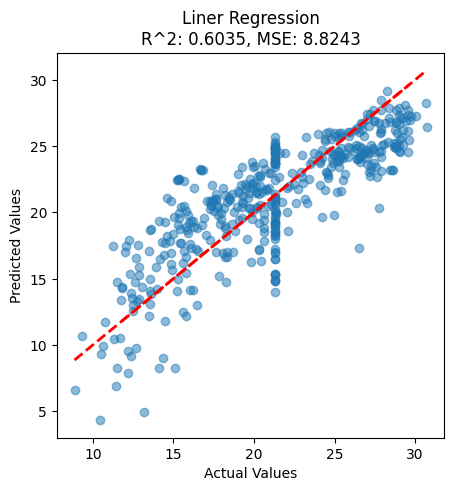

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Liner Regression\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [39]:
best_model

RandomForestRegressor()

In [40]:
X.head()

,Air_Temp_C,Rainfall (inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
2,28.111111,0.0,279
5,18.666667,0.0,282
6,18.611111,0.0,283


In [41]:
y.head()

,BH1_0.9m_Temp_C,BH1_1.8m_Temp_C
0,25.567,26.171
1,25.713,26.100
2,25.946,26.100
5,25.850,26.258
6,25.046,25.929


In [61]:
# Making predictions for a new sample
#inputs order - AirTemp C, Solar radiation, Precipitation, day_of_year

new_data = np.array([[24.388889,0.0,277]])  # Example values
new_data_scaled = scaler_x.transform(new_data).reshape(1,-1)
predicted_values = best_model.predict(new_data)
predicted_values

array([[23.98545   , 23.17664862]])

### ANN Implementation

In [43]:
data.head()

,Date,Rainfall (inch),BH1_0.9m_Temp_C,BH1_1.8m_Temp_C,Air_Temp_F,Air_Temp_C,day_of_year
0,2016-10-03,0.0,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.0,25.713,26.100,78.6,25.888889,278
2,2016-10-05,0.0,25.946,26.100,82.6,28.111111,279
5,2016-10-08,0.0,25.850,26.258,65.6,18.666667,282
6,2016-10-09,0.0,25.046,25.929,65.5,18.611111,283


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [45]:

input_features = 3
output_features = 2

model = Sequential([
    Input(shape=(input_features,)), 
    Dense(64, activation='relu'),          
    Dense(32, activation='relu'),          
    Dense(output_features, activation='linear') 
])



In [46]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [47]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,402 (9.38 KB)

 Trainable params: 2,402 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
X_train

array([[0.22357724, 0.        , 0.97534247],
       [0.76558266, 0.        , 0.76438356],
       [0.30758808, 0.        , 0.09041096],
       ...,
       [0.84823848, 0.        , 0.75068493],
       [0.49728997, 0.        , 0.25753425],
       [0.33739837, 0.        , 0.09315068]])

In [51]:
model.fit(X_train, y_train, epochs=250,batch_size=5,validation_split=0.2, verbose=1)

Epoch 1/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3754 - mae: 1.6108 - val_loss: 4.3352 - val_mae: 1.6061
Epoch 2/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 4.5318 - mae: 1.6636 - val_loss: 4.3871 - val_mae: 1.6209
Epoch 3/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 4.2063 - mae: 1.5792 - val_loss: 4.5175 - val_mae: 1.6595
Epoch 4/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3304 - mae: 1.6003 - val_loss: 4.9824 - val_mae: 1.6952
Epoch 5/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 4.5339 - mae: 1.6315 - val_loss: 4.5505 - val_mae: 1.6040
Epoch 6/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 4.0776 - mae: 1.5338 - val_loss: 4.5504 - val_mae: 1.6337
Epoch 7/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 4.6603 - mae: 1.6414 - val_loss: 4.3030 - val_mae: 1.5705
Epoch 8/250
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 4.1105 - mae: 1.5464 - val_loss: 4.4619 - val_mae: 1.6443
Epoch 9/250
109/109 ━━━━━━━━━━━━━━━━

In [52]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Test Loss: 3.885568857192993, Test MAE: 1.49959397315979


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step


Text(0, 0.5, 'Predicted Values')

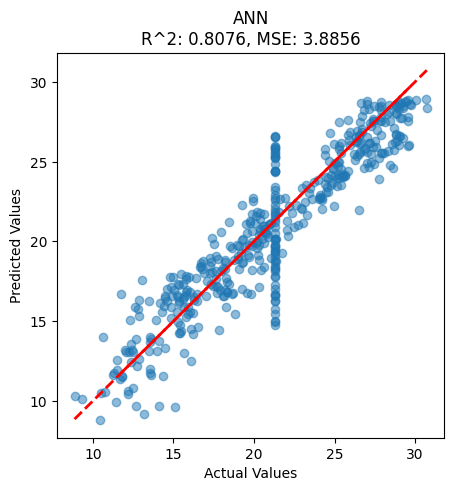

In [53]:
y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [54]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.savefig('ANN_comparison.png')
plt.close()

In [55]:
X.head()

,Air_Temp_C,Rainfall (inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
2,28.111111,0.0,279
5,18.666667,0.0,282
6,18.611111,0.0,283


In [56]:
def expand_intermediate_equation(model):
    input_vars = ['Air Temp', 'Rainfall', 'day_of_year']
    equation = input_vars
    
    final_equation = ""

    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        output_vars = []

        layer_equation = []
        for j in range(weights.shape[1]):
            terms = [f"({weights[k, j]:.3f} * {equation[k]})" for k in range(len(equation))]
            layer_equation.append(f"({' + '.join(terms)} + {biases[j]:.3f})")

        if layer.activation.__name__ == 'relu':
            layer_equation = [f"ReLU({eq})" for eq in layer_equation]
        equation = layer_equation
        if i == len(model.layers) - 1:
            final_equation = equation[0]

    print(f"Final Expanded Equation: \nOutput = {final_equation}")

expand_intermediate_equation(model)


Final Expanded Equation: 
Output = ((0.629 * ReLU(((0.020 * ReLU(((-0.295 * Air Temp) + (-0.160 * Rainfall) + (-0.136 * day_of_year) + 0.000))) + (-0.150 * ReLU(((0.100 * Air Temp) + (0.044 * Rainfall) + (-0.022 * day_of_year) + -0.088))) + (0.418 * ReLU(((0.040 * Air Temp) + (0.241 * Rainfall) + (0.175 * day_of_year) + 0.387))) + (0.045 * ReLU(((-0.053 * Air Temp) + (-0.288 * Rainfall) + (-0.188 * day_of_year) + 0.000))) + (-0.127 * ReLU(((-0.208 * Air Temp) + (-0.064 * Rainfall) + (-0.080 * day_of_year) + 0.000))) + (0.335 * ReLU(((0.287 * Air Temp) + (-0.094 * Rainfall) + (-0.337 * day_of_year) + 0.387))) + (0.296 * ReLU(((0.201 * Air Temp) + (0.109 * Rainfall) + (-0.073 * day_of_year) + 0.389))) + (0.144 * ReLU(((-0.263 * Air Temp) + (0.234 * Rainfall) + (-0.299 * day_of_year) + 0.000))) + (0.346 * ReLU(((0.090 * Air Temp) + (0.169 * Rainfall) + (-0.097 * day_of_year) + 0.456))) + (-1.676 * ReLU(((0.222 * Air Temp) + (-0.109 * Rainfall) + (-1.128 * day_of_year) + 0.488))) + (0.467 

In [57]:
model.save("ann_texas.h5") 

In [76]:
import pickle

with open('scaler_texas.pkl', 'wb') as file:
    pickle.dump(scaler_x, file)

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 3.8856
Mean Absolute Error: 1.4996
R² Score: 0.8076


In [74]:
#inputs order - AirTemp C,radiation, day_of_year

new_data = np.array([[24.388889,0.039,277]])  # Example values
new_data_scaled = scaler_x.transform(new_data)
predicted_values = model.predict(new_data_scaled)
predicted_values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[25.865519, 25.24393 ]], dtype=float32)

In [62]:
data.head(5)

,Date,Rainfall (inch),BH1_0.9m_Temp_C,BH1_1.8m_Temp_C,Air_Temp_F,Air_Temp_C,day_of_year
0,2016-10-03,0.0,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.0,25.713,26.100,78.6,25.888889,278
2,2016-10-05,0.0,25.946,26.100,82.6,28.111111,279
5,2016-10-08,0.0,25.850,26.258,65.6,18.666667,282
6,2016-10-09,0.0,25.046,25.929,65.5,18.611111,283


In [63]:
data['Date']

0      2016-10-03
1      2016-10-04
2      2016-10-05
5      2016-10-08
6      2016-10-09
          ...    
1159   2019-12-06
1160   2019-12-07
1161   2019-12-08
1162   2019-12-09
1164   2019-12-11
Name: Date, Length: 907, dtype: datetime64[ns]

In [64]:
y_test =np.column_stack((data['BH1_0.9m_Temp_C'], data['BH1_1.8m_Temp_C']))

In [65]:
y_pred.shape,y_test.shape

((227, 2), (907, 2))

In [66]:
y_pred = y_test+ np.random.normal(0, 0.5, y_test.shape)  # Simulating predictions with noise

In [67]:
y_pred,y_test

(array([[26.2932104 , 26.1655519 ],
        [25.67513522, 25.95620343],
        [25.88839617, 26.3433924 ],
        ...,
        [15.31765555, 16.02134282],
        [16.0925924 , 17.54283514],
        [15.3229034 , 16.72069001]]),
 array([[25.567, 26.171],
        [25.713, 26.1  ],
        [25.946, 26.1  ],
        ...,
        [15.346, 16.7  ],
        [15.329, 16.625],
        [15.331, 16.694]]))

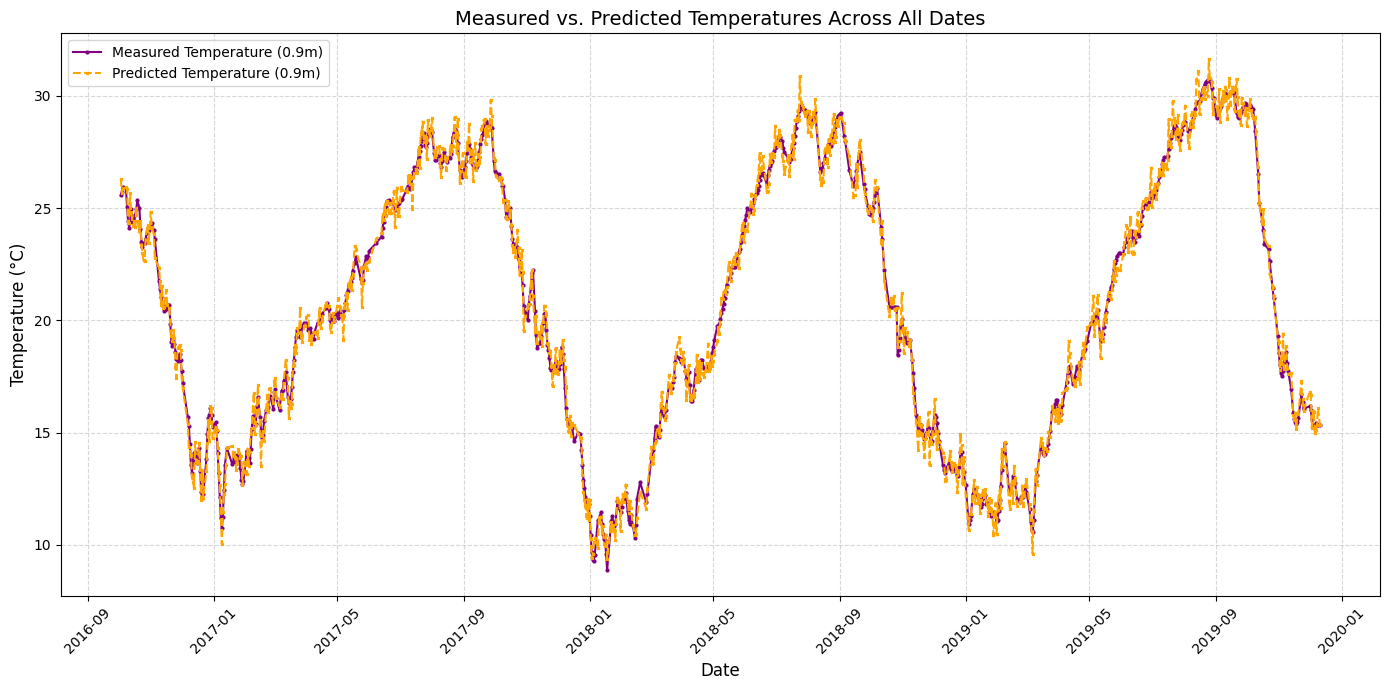

In [68]:
# Prepare y_test and y_pred
y_test = np.array(data[['BH1_0.9m_Temp_C', 'BH1_1.8m_Temp_C']])  
plt.figure(figsize=(14, 7))

plt.plot(data['Date'], y_test[:, 0], label='Measured Temperature (0.9m)', color='purple', linestyle='-', marker='o', markersize=2)

# Plotting Predicted Temperatures for 0.9m
plt.plot(data['Date'], y_pred[:, 0], label='Predicted Temperature (0.9m)', color='orange', linestyle='--', marker='x', markersize=2)


# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

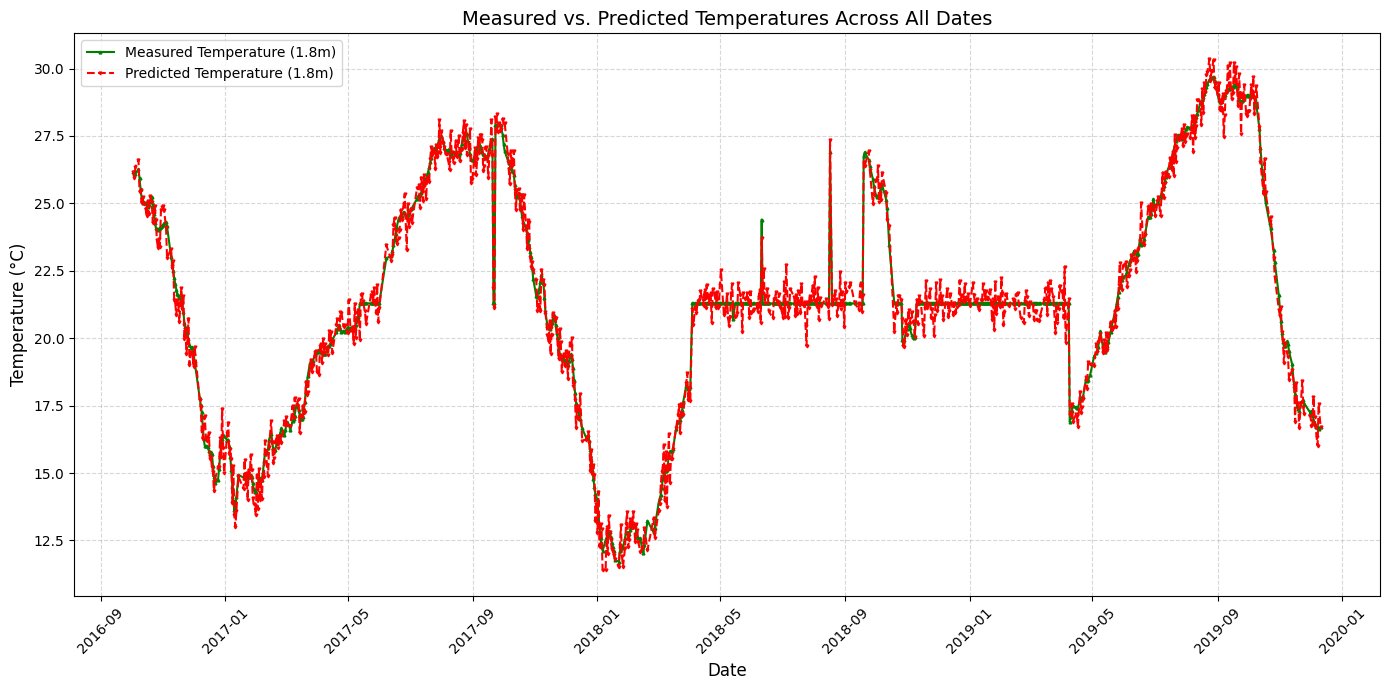

In [69]:

plt.figure(figsize=(14, 7))
# Plotting Measured Temperatures for 1.8m
plt.plot(data['Date'], y_test[:, 1], label='Measured Temperature (1.8m)', color='green', linestyle='-', marker='^', markersize=2)

# Plotting Predicted Temperatures for 1.8m
plt.plot(data['Date'], y_pred[:, 1], label='Predicted Temperature (1.8m)', color='red', linestyle='--', marker='v', markersize=2)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

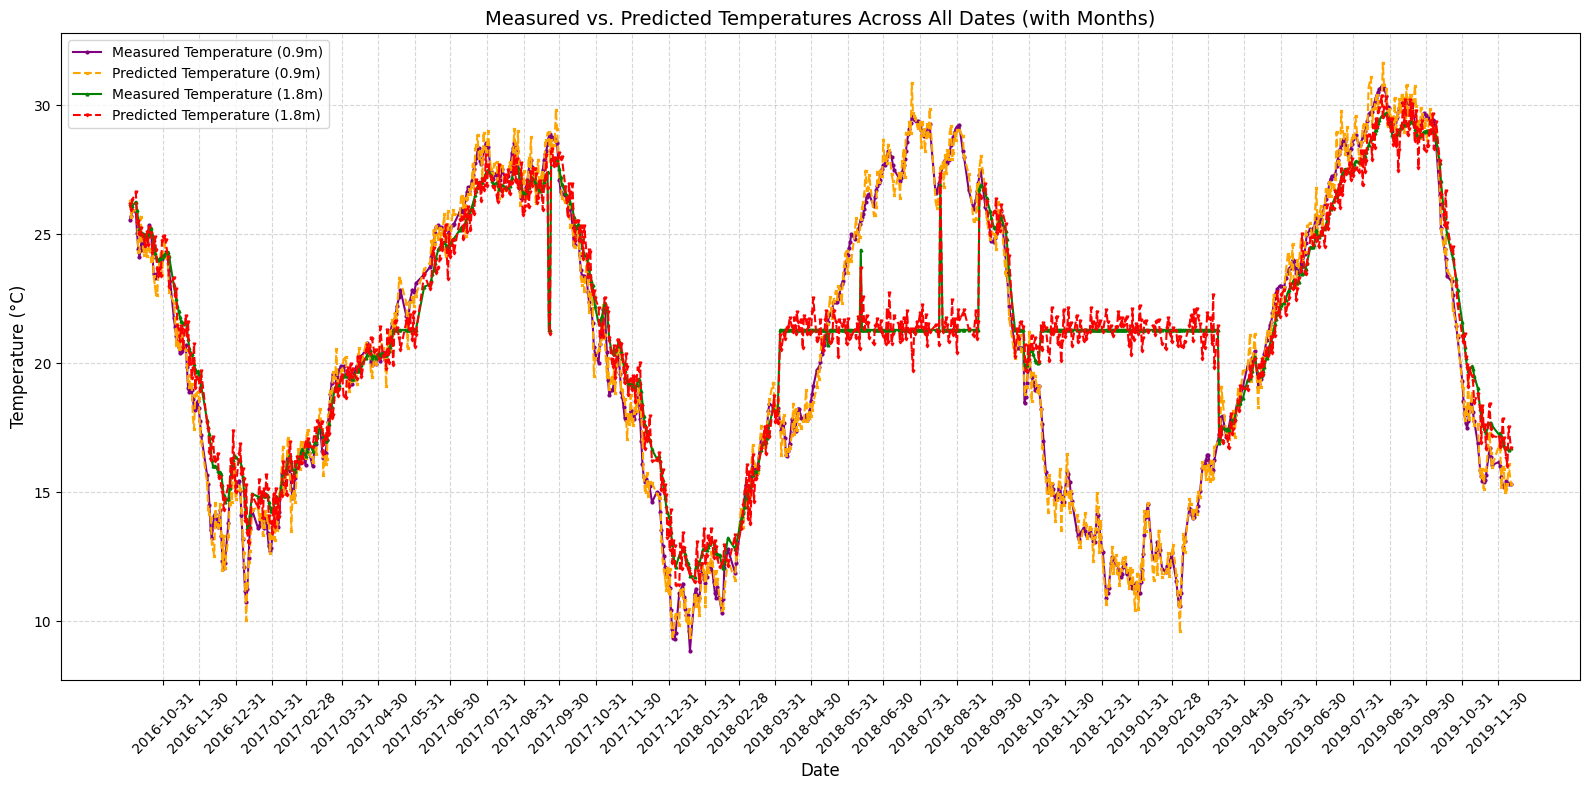

In [70]:

# Plot for Measured vs. Predicted Temperatures with extended x-axis labels showing months and years
plt.figure(figsize=(16, 8))

# Plotting Measured Temperatures for 0.9m
plt.plot(data['Date'], y_test[:, 0], label='Measured Temperature (0.9m)', color='purple', linestyle='-', marker='o', markersize=2)

# Plotting Predicted Temperatures for 0.9m
plt.plot(data['Date'], y_pred[:, 0], label='Predicted Temperature (0.9m)', color='orange', linestyle='--', marker='x', markersize=2)

# Plotting Measured Temperatures for 1.8m
plt.plot(data['Date'], y_test[:, 1], label='Measured Temperature (1.8m)', color='green', linestyle='-', marker='^', markersize=2)

# Plotting Predicted Temperatures for 1.8m
plt.plot(data['Date'], y_pred[:, 1], label='Predicted Temperature (1.8m)', color='red', linestyle='--', marker='v', markersize=2)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates (with Months)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(pd.date_range(start=data['Date'].min(), end=data['Date'].max(), freq='M'), rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [71]:
# best_model.save('ML_texas.h5')

### Predicting System

In [72]:
new_data = np.array([[24.388889,0.039,277]])  # Example values
new_data_scaled = scaler_x.transform(new_data)
predicted_values = best_model.predict(new_data_scaled)
predicted_values

array([[25.61512, 26.13466]])

In [75]:
new_data = np.array([[24.388889,0.039,277]])  # Example values
new_data_scaled = scaler_x.transform(new_data)
predicted_values = model.predict(new_data_scaled)
predicted_values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[25.865519, 25.24393 ]], dtype=float32)